# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/home-credit-default-risk/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
app_train.shape

(307511, 122)

In [3]:
# 將只有「兩種值」的「類別型欄位」, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder as le

# 檢查每一個 column
for col in app_train.columns:
    if app_train[col].dtypes == np.dtype('object'):
        if len(app_train[col].unique()) <= 2:
            app_train[col] = le().fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"] ==365243
app_train["DAYS_EMPLOYED"].replace({365243:np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [5]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

app_train['YEARS_BIRTH'] = app_train["DAYS_BIRTH"] / 365
age_data = app_train[['YEARS_BIRTH', 'TARGET']]

# 將'YEARS_BIRTH'離散成「等距」的10組
age_data['age_discrete1'] = pd.cut(age_data['YEARS_BIRTH'], 10)
age_data['age_discrete1'].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: age_discrete1, dtype: int64

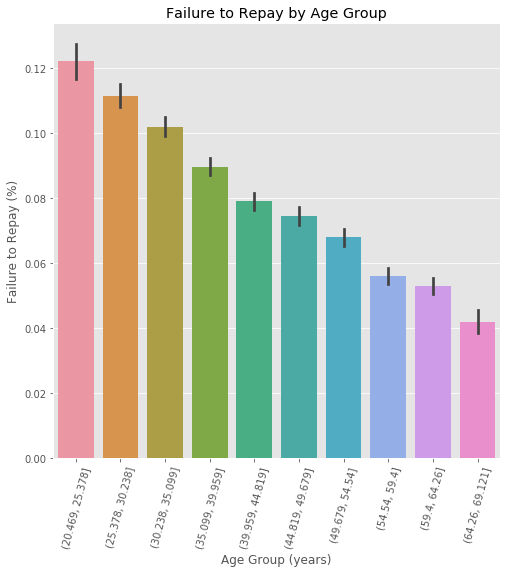

In [6]:
plt.figure(figsize = (8, 8))
plt.style.use('ggplot')

px =  age_data['age_discrete1'] 
py =  age_data['TARGET'] 
sns.barplot(px,py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [7]:
# 將'YEARS_BIRTH'離散成「等頻率」的10組
age_data['age_discrete2'] = pd.qcut(age_data['YEARS_BIRTH'], 10)
age_data['age_discrete2'].value_counts()

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: age_discrete2, dtype: int64

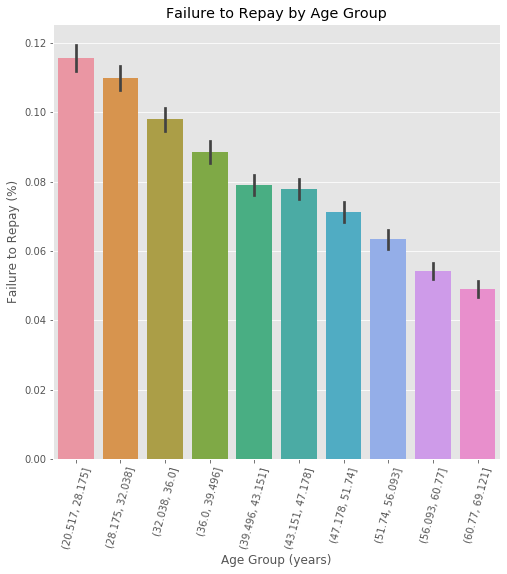

In [8]:
plt.figure(figsize = (8, 8))

px =  age_data['age_discrete2'] 
py =  age_data['TARGET'] 
sns.barplot(px,py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [9]:
age_data.head()

,YEARS_BIRTH,TARGET,age_discrete1,age_discrete2
0,25.920548,1,"(25.378, 30.238]","(20.517, 28.175]"
1,45.931507,0,"(44.819, 49.679]","(43.151, 47.178]"
2,52.180822,0,"(49.679, 54.54]","(51.74, 56.093]"
3,52.068493,0,"(49.679, 54.54]","(51.74, 56.093]"
4,54.608219,0,"(54.54, 59.4]","(51.74, 56.093]"


#### 透過pd.cut()與pd.qcut()這2種方式，將YEARS_BIRTH這個column分別分成按照「等距」和「等頻率」分組：
實際觀察直條圖，可以歸納出，還款能力與年齡有很大的關係，普遍來說，年齡越大，還款能力越強